# Time Series Modelling, round 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('FE_data_18-19.csv', index_col=0)

In [3]:
df.head()

,Location,JDay,Date,SsMean,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
0,Cranford,164,2018-06-13,295.035,7.7,26.5,17.9,38.4,0.0,22.6,...,21.45,22.075,24.114286,8.433333,10.900000,9.295918,168.128333,218.488333,169.64,4.325
1,Cranford,165,2018-06-14,106.900,4.6,22.0,13.1,65.9,1.2,19.1,...,26.50,22.075,24.114286,7.700000,10.900000,9.295918,295.035000,218.488333,169.64,4.325
2,Cranford,166,2018-06-15,164.775,7.2,22.0,13.2,77.8,7.2,11.1,...,22.00,22.075,24.114286,4.600000,10.900000,9.295918,106.900000,218.488333,169.64,4.325
3,Cranford,167,2018-06-16,138.380,11.2,18.1,12.5,89.3,9.8,16.5,...,22.00,23.500,24.114286,7.200000,6.500000,9.295918,164.775000,188.903333,169.64,8.400
4,Cranford,168,2018-06-17,154.545,7.7,21.8,15.8,67.1,0.0,7.8,...,18.10,20.700,24.114286,11.200000,7.666667,9.295918,138.380000,136.685000,169.64,18.200


In [4]:
# sort by date
df.sort_values(by='Date', inplace=True)

In [5]:
df.head()

,Location,JDay,Date,SsMean,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
0,Cranford,164,2018-06-13,295.035000,7.7,26.5,17.9,38.4,0.0,22.6,...,21.45,22.075000,24.114286,8.433333,10.900000,9.295918,168.128333,218.488333,169.640000,4.325
54,Taber,164,2018-06-13,41.923333,8.1,26.1,17.9,39.0,0.0,19.0,...,21.35,22.716667,25.487755,9.100000,11.508333,11.261224,41.041111,37.394722,63.708707,3.350
1,Cranford,165,2018-06-14,106.900000,4.6,22.0,13.1,65.9,1.2,19.1,...,26.50,22.075000,24.114286,7.700000,10.900000,9.295918,295.035000,218.488333,169.640000,4.325
55,Taber,165,2018-06-14,66.596667,6.2,21.7,13.5,65.5,6.0,15.7,...,26.10,22.716667,25.487755,8.100000,11.508333,11.261224,41.923333,37.394722,63.708707,3.350
2,Cranford,166,2018-06-15,164.775000,7.2,22.0,13.2,77.8,7.2,11.1,...,22.00,22.075000,24.114286,4.600000,10.900000,9.295918,106.900000,218.488333,169.640000,4.325


In [6]:
df.shape

(545, 37)

In [9]:
# make date the index
df.set_index('Date',inplace=True)

In [10]:
df.head()

,Location,JDay,SsMean,MinTemp,MaxTemp,AvgTemp,AvgRH,Precip,AvgWindSpeed,month,...,MaxTemp_1,MaxTemp_3,MaxTemp_7,MinTemp_1,MinTemp_3,MinTemp_7,SsMean_1,SsMean_3,SsMean_7,precip_3dTotal
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-13,Cranford,164,295.035000,7.7,26.5,17.9,38.4,0.0,22.6,6,...,21.45,22.075000,24.114286,8.433333,10.900000,9.295918,168.128333,218.488333,169.640000,4.325
2018-06-13,Taber,164,41.923333,8.1,26.1,17.9,39.0,0.0,19.0,6,...,21.35,22.716667,25.487755,9.100000,11.508333,11.261224,41.041111,37.394722,63.708707,3.350
2018-06-14,Cranford,165,106.900000,4.6,22.0,13.1,65.9,1.2,19.1,6,...,26.50,22.075000,24.114286,7.700000,10.900000,9.295918,295.035000,218.488333,169.640000,4.325
2018-06-14,Taber,165,66.596667,6.2,21.7,13.5,65.5,6.0,15.7,6,...,26.10,22.716667,25.487755,8.100000,11.508333,11.261224,41.923333,37.394722,63.708707,3.350
2018-06-15,Cranford,166,164.775000,7.2,22.0,13.2,77.8,7.2,11.1,6,...,22.00,22.075000,24.114286,4.600000,10.900000,9.295918,106.900000,218.488333,169.640000,4.325


## SVR, no scaling

In [94]:
# split off end of 2019 as test set
test_size = df.shape[0] - 14
train, test = df.iloc[:test_size], df.iloc[test_size:]

In [95]:
# encode location
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

<ipython-input-95-5b24073b50fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-95-5b24073b50fb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


In [96]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [97]:
y_pred = svr.predict(X_test)
svr.score(X_test, y_test.values)

-0.12800930306948777

In [32]:
len(y_pred)

7

In [33]:
len(y_test)

7

In [98]:
train_pred = svr.predict(X_train)

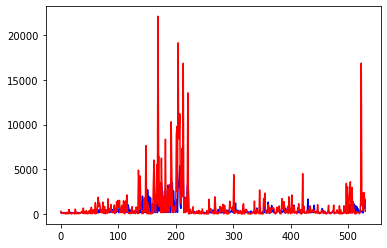

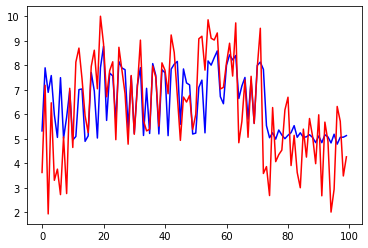

In [99]:
# plot
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.exp(train_pred), c='b')
plt.plot(np.exp(y_train.values), c='r')
plt.show()

# close up
plt.plot(train_pred[150:250], c='b')
plt.plot(y_train.values[150:250], c='r')
plt.show()

<AxesSubplot:xlabel='Date'>

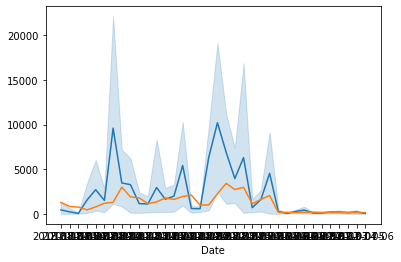

In [100]:
import seaborn as sns

sns.lineplot(x=y_train.index[150:250], y=np.exp(y_train.values)[150:250])
sns.lineplot(x=y_train.index[150:250], y=np.exp(train_pred)[150:250], ci=None)

In [69]:
# set up confidence intervals for assessment
from numpy import sqrt, mean, std
from numpy import sum as arraysum

def confidence(true, pred):
    true = np.exp(true)
    pred = np.exp(pred)
    sum_errs = arraysum((true-pred)**2)
    stdev = sqrt(1/(len(true)-2) * sum_errs)
    interval = 1.96*stdev
    ci_lower = []
    ci_upper = []
    for i in range(len(true)):
        y = true[i]
        yhat = pred[i]
        lower = yhat - interval
        upper = yhat + interval
        ci_lower.append(lower)
        ci_upper.append(upper)
    return ci_lower, ci_upper

In [70]:
con_lower, con_upper = confidence(y_train.values, train_pred)

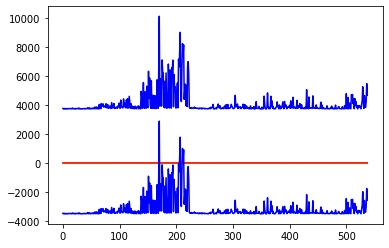

In [71]:
plt.plot(y_train.values, c='y')
plt.plot(train_pred, c='r')
plt.plot(con_lower, c='b')
plt.plot(con_upper, c='b')

plt.show()

In [72]:
true = np.exp(y_train.values)
pred = np.exp(train_pred)
sum_errs = arraysum((true-pred)**2)
stdev = sqrt(1/(len(true)-2) * sum_errs)
interval = 1.96*stdev

In [73]:
stdev

1842.5324260660402

In [74]:
interval

3611.3635550894387

### Try with scaling

In [108]:
# split off end of 2019 as test set
test_size = df.shape[0] - 30
train, test = df.iloc[:test_size], df.iloc[test_size:]

In [109]:
# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

<ipython-input-109-04d70abd223c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-109-04d70abd223c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


In [110]:
from sklearn.preprocessing import StandardScaler

X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [112]:
y_pred = svr.predict(X_test)
score = svr.score(X_test, y_test.values)
print(score)
train_pred = svr.predict(X_train)

0.19718571066170787


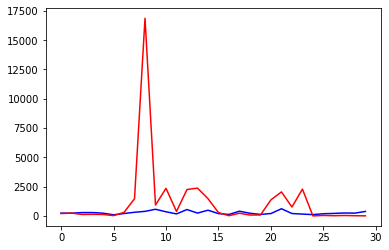

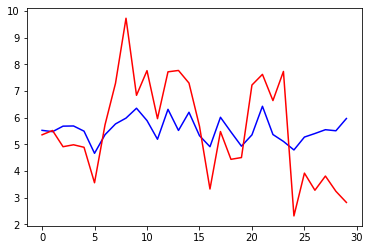

In [113]:
plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

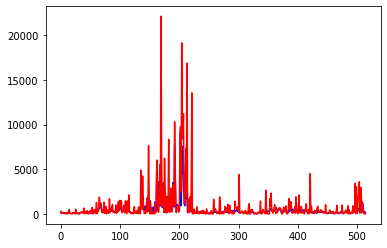

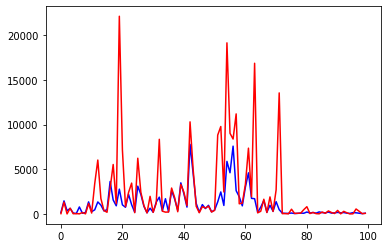

In [115]:
# plot
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.exp(train_pred), c='b')
plt.plot(np.exp(y_train.values), c='r')
plt.show()

# close up
plt.plot(np.exp(train_pred)[150:250], c='b')
plt.plot(np.exp(y_train.values)[150:250], c='r')
plt.show()

# Try modelling by location

In [116]:
locations = df['Location'].unique().tolist()

dfa = df.loc[df['Location'] == locations[0]].copy()
dfb = df.loc[df['Location'] == locations[1]].copy()
dfc = df.loc[df['Location'] == locations[2]].copy()
dfd = df.loc[df['Location'] == locations[3]].copy()
dfe = df.loc[df['Location'] == locations[4]].copy()
dff = df.loc[df['Location'] == locations[5]].copy()
dfg = df.loc[df['Location'] == locations[6]].copy()
dfh = df.loc[df['Location'] == locations[7]].copy()
dfi = df.loc[df['Location'] == locations[8]].copy()

In [117]:
locations

['Cranford',
 'Taber',
 'Vauxhall',
 '1906',
 '1919',
 '1910',
 '1904',
 '1917',
 '1915']

In [120]:
dfb.shape

(76, 36)

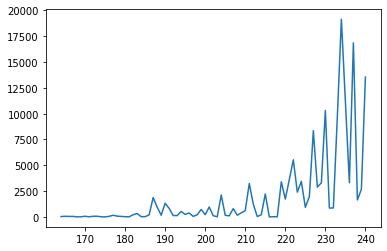

In [129]:
y = dfb.SsMean
x = dfb.JDay

plt.plot(x,y)
plt.show()

In [130]:
# split off end of 2019 as test set
test_size = dfb.shape[0] - 14
train, test = dfb.iloc[:test_size], dfb.iloc[test_size:]

#### no scaling, target=log

In [131]:
# encode location
le = LabelEncoder()
le.fit(train['Location'])
train['Location'] = le.transform(train['Location'])
test['Location'] = le.transform(test['Location'])

<ipython-input-131-04d70abd223c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Location'] = le.transform(train['Location'])
<ipython-input-131-04d70abd223c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Location'] = le.transform(test['Location'])


In [132]:
X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [133]:
y_pred = svr.predict(X_test)
score = svr.score(X_test, y_test.values)
print(score)
train_pred = svr.predict(X_train)

-4.312875185342963


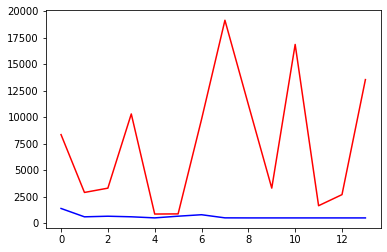

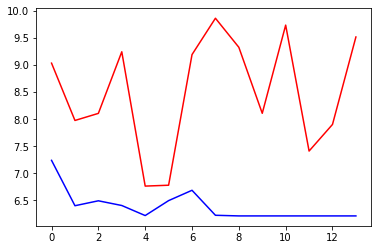

In [134]:
plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

#### no scaling, target=Mean

In [135]:
X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.SsMean, test.SsMean

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [136]:
y_pred = svr.predict(X_test)
score = svr.score(X_test, y_test.values)
print(score)
train_pred = svr.predict(X_train)

-1.5302655907045817


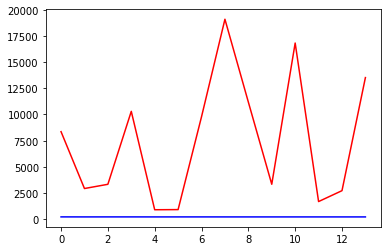

In [138]:
plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

#### scaling, target = log

In [140]:
X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.logSsMean, test.logSsMean

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [141]:
y_pred = svr.predict(X_test)
score = svr.score(X_test, y_test.values)
print(score)
train_pred = svr.predict(X_train)

-9.063951816009322


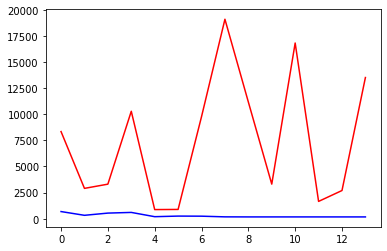

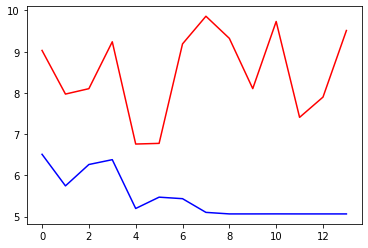

In [142]:
plt.plot(np.exp(y_pred), c='b')
plt.plot(np.exp(y_test.values), c='r')
plt.show()

plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()

#### scaling, target = mean

In [143]:
X_train, X_test = train.drop(labels=['SsMean','logSsMean'], axis=1), test.drop(labels=['SsMean','logSsMean'], axis=1)
y_train, y_test = train.SsMean, test.SsMean

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [144]:
y_pred = svr.predict(X_test)
score = svr.score(X_test, y_test.values)
print(score)
train_pred = svr.predict(X_train)

-1.5321893437867393


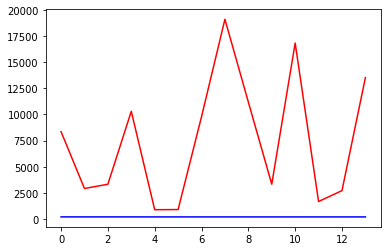

In [146]:
plt.plot(y_pred, c='b')
plt.plot(y_test.values, c='r')
plt.show()